In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sin,cos,tan
import math

In [49]:
#data file read
data_df = pd.read_csv('14141Kdata-Copy.csv', header=None)

#convert panda to numpy array
data = data_df.values

#lamda values
lamda_values = data[:,0]

In [50]:
#order of mineral: [Agglutinate, pyroxene, Plagioclase, Olivine, Ilmenite, Volcanic Glass]

#density in g/cc
density = [1.8, 3.3, 2.69, 3.3, 4.79, 2.4]

#abundance for sample 14141(here, abundance of metallic iron not present, order different and both pyroxenes mixed)
abundance = [48.6, 10.9, 28.0, 1.6, 1.1, 7.4]

#diameter has different samples for orthopyroxene. Only one needed
meanDiameter = [110, 175, 11, 20, 15, 10]

#refractive index for metallic iron taken as avg of 2.25,3.36
refractiveIndex = [1.49, 1.75, 1.56, 1.83, 2.13, 1.64]

#imaginary refractive index (k)
refractiveIndexI = [.2, .2, .2, .2, .2, .2]*5

In [51]:
#incidence angle
i = 30
#emergence angle
e = 0
#phase angle
g = 30

phi = .41
h = -(3.0/8.0)*(np.log(1-phi))
b = -.4
c = .25

mu = cos(i)
mu_0 = cos(e)


In [52]:
def get_B(h,g):
    
    B = 1/(1 + (1/h)*tan(g/2))
    return B

def get_P(g,b,c):
    
    P = 1 + b*cos(g) + c*((3/2)*cos(g)*cos(g) - (1/2))
    return P

In [53]:
def get_H(x,y):
    
    g = np.sqrt(1-y)
    r = (1-g)/(1+g)
    value = 1.0/(1-(1-g)*x*(r + (1-.5*r-r*x)*np.log((1+x)/x)))
    return value

In [54]:
def get_avgDist(n,D):
    Dist = (2/3)*(np.power(n,2) - (1/n)*np.power((np.power(n,2)) -1,(3/2)))*D
    return Dist

In [55]:
def Si(n):
    return 1 - (4/(n*((n+1)**2)))

def Se(n,k):
    return ((n-1) **2 + k**2)/((n+1)**2 + k**2) + 0.05

def Dis(n,D):
    temp = math.pow(n,2) - 1
    
    val = (1/n) * (math.pow(temp,(3.0/2.0))) 
    
    Dis = (2.0/3.0) * (math.pow(n,2) - val) * D
    
    return Dis
        
def Theta(alpha,Dis):
    return np.exp(-alpha*Dis)
    
def Alpha(n,k,lamda):
     return (4*(math.pi)*n*k/lamda)

def W(Se,Si,theta):
    return Se + (1-Se) * ((1-Si)*theta/(1-(Se*theta)))

In [56]:
def W_ave(lamda):
    w = np.zeros(6)
    si = np.zeros(6)
    se = np.zeros(6)
    dis = np.zeros(6)
    alpha = np.zeros(6)
    theta = np.zeros(6)
    nume = np.zeros(6)
    deno = np.zeros(6)
    D = 15e-6
    lamda = lamda*10**-9
    for i in range(0,6):
        si[i] = Si(refractiveIndex[i])
        se[i] = Se(refractiveIndex[i],refractiveIndexI[i])
        dis[i] = Dis(refractiveIndex[i],D)
        alpha[i] = Alpha(refractiveIndex[i],refractiveIndexI[i],lamda)
        theta[i] = Theta(alpha[i],dis[i])
        w[i] = W(se[i],si[i],theta[i])

    for i in range(0,6):
        nume[i] = abundance[i]*w[i]/(density[i]*meanDiameter[i])
        deno[i] = abundance[i]/(density[i]*meanDiameter[i])

    w_ave = np.sum(nume)/np.sum(deno)
    return w_ave

In [57]:
W_ave(400)

0.10600409776135002

In [58]:
def Reflectance(lamda):
    w_ave = W_ave(lamda)
    t1 = 1 + get_B(h,g)
    t2 = get_P(g,b,c)
    t3 = get_H(mu_0,w_ave)*get_H(mu,w_ave)
    t5 = mu_0/(4*(math.pi))
    t6 = mu_0/(mu_0 + mu)
    
    ref = t5*t6*(t1*t2+t3-1)
    return ref

In [59]:
ans = np.zeros(461)
for i in range(0,461):
    ans[i] = Reflectance(lamda_values[i])
    

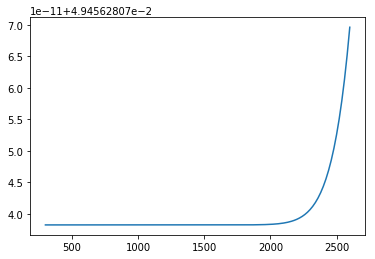

In [60]:
plt.plot(lamda_values,ans)